In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/Metro_Interstate_Traffic_Volume.csv')

# Convert 'date_time' column to datetime type
df['date_time'] = pd.to_datetime(df['date_time'])

# Extract hours and day of the week
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.day_name()

# Display the DataFrame with new columns
print(df[['date_time', 'hour', 'day_of_week']])


                date_time  hour day_of_week
0     2012-10-02 09:00:00     9     Tuesday
1     2012-10-02 10:00:00    10     Tuesday
2     2012-10-02 11:00:00    11     Tuesday
3     2012-10-02 12:00:00    12     Tuesday
4     2012-10-02 13:00:00    13     Tuesday
...                   ...   ...         ...
48199 2018-09-30 19:00:00    19      Sunday
48200 2018-09-30 20:00:00    20      Sunday
48201 2018-09-30 21:00:00    21      Sunday
48202 2018-09-30 22:00:00    22      Sunday
48203 2018-09-30 23:00:00    23      Sunday

[48204 rows x 3 columns]


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/Metro_Interstate_Traffic_Volume.csv')

# Convert 'date_time' column to datetime type
df['date_time'] = pd.to_datetime(df['date_time'])

# Extract hours and day of the week
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.day_name()

# One-hot encode 'weather_main' column for all unique values
df = pd.get_dummies(df, columns=['weather_main'], prefix='weather')

# Display the DataFrame with new columns
print(df[['date_time', 'hour', 'day_of_week'] + [col for col in df.columns if col.startswith('weather_')]])


                date_time  hour day_of_week     weather_description  \
0     2012-10-02 09:00:00     9     Tuesday        scattered clouds   
1     2012-10-02 10:00:00    10     Tuesday           broken clouds   
2     2012-10-02 11:00:00    11     Tuesday         overcast clouds   
3     2012-10-02 12:00:00    12     Tuesday         overcast clouds   
4     2012-10-02 13:00:00    13     Tuesday           broken clouds   
...                   ...   ...         ...                     ...   
48199 2018-09-30 19:00:00    19      Sunday           broken clouds   
48200 2018-09-30 20:00:00    20      Sunday         overcast clouds   
48201 2018-09-30 21:00:00    21      Sunday  proximity thunderstorm   
48202 2018-09-30 22:00:00    22      Sunday         overcast clouds   
48203 2018-09-30 23:00:00    23      Sunday         overcast clouds   

       weather_Clear  weather_Clouds  weather_Drizzle  weather_Fog  \
0                  0               1                0            0   
1      

<ipython-input-3-d4c5d60a14e1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['holiday'] = X['holiday'].apply(lambda x: 1 if x.lower() != 'none' else 0)


Epoch 1/10
964/964 [==============================] - 40s 30ms/step - loss: 14286161.0000 - mae: 3215.9500 - val_loss: 14084401.0000 - val_mae: 3181.8933
Epoch 2/10
  9/964 [..............................] - ETA: 12s - loss: 13997416.0000 - mae: 3162.3257

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


964/964 [==============================] - 16s 17ms/step - loss: 13878683.0000 - mae: 3152.2573 - val_loss: 13692312.0000 - val_mae: 3119.8733
Epoch 3/10
964/964 [==============================] - 17s 18ms/step - loss: 13493142.0000 - mae: 3090.6055 - val_loss: 13312464.0000 - val_mae: 3058.6152
Epoch 4/10
964/964 [==============================] - 17s 17ms/step - loss: 13117583.0000 - mae: 3029.6145 - val_loss: 12941691.0000 - val_mae: 2997.8870
Epoch 5/10
964/964 [==============================] - 17s 18ms/step - loss: 12751028.0000 - mae: 2969.9102 - val_loss: 12579684.0000 - val_mae: 2939.5527
Epoch 6/10
964/964 [==============================] - 19s 19ms/step - loss: 12392641.0000 - mae: 2913.7092 - val_loss: 12225247.0000 - val_mae: 2885.5264
Epoch 7/10
964/964 [==============================] - 17s 17ms/step - loss: 12041918.0000 - mae: 2862.2417 - val_loss: 11878540.0000 - val_mae: 2835.7217
Epoch 8/10
964/964 [==============================] - 16s 17ms/step - loss: 11699372.00

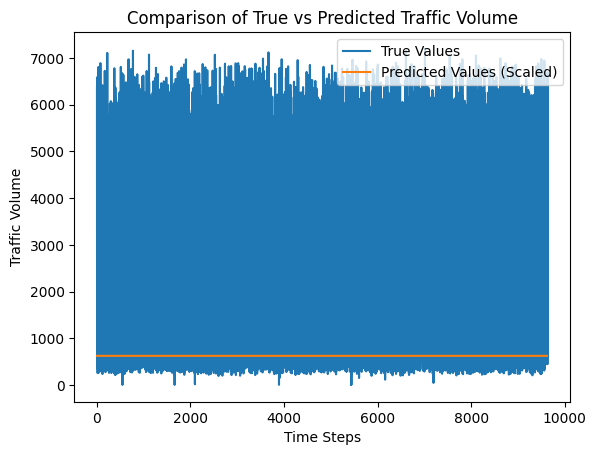

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dropout, Bidirectional, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Load data from the CSV file
# Assuming 'traffic_volume' is the target variable

X = df[['holiday', 'temp']]  # Features
y = df['traffic_volume']  # Target variable

# Encode 'holiday' column as binary indicator
X['holiday'] = X['holiday'].apply(lambda x: 1 if x.lower() != 'none' else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for Conv1D layer
n_input = 20
n_features = X_train_scaled.shape[1]
X_train_reshaped = np.array([X_train_scaled[i:i+n_input, :] for i in range(len(X_train_scaled)-n_input)])
y_train_reshaped = y_train.values[n_input:]

# Create the model
reg = l2(0.0001)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=6, input_shape=(n_input, n_features), activation='relu'))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(units=32, dropout=0.3, kernel_regularizer=reg)))
model.add(Dense(units=1, kernel_regularizer=reg))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Train the model
early = EarlyStopping(monitor='val_loss', patience=5)
check = ModelCheckpoint(filepath='lstm_traffic_model.h5', monitor='val_loss', save_best_only=True)
history = model.fit(X_train_reshaped, y_train_reshaped, epochs=10, validation_split=0.2, callbacks=[early, check])

# Make predictions for the test set
X_test_reshaped = np.array([X_test_scaled[i:i+n_input, :] for i in range(len(X_test_scaled)-n_input)])
y_pred_scaled = model.predict(X_test_reshaped)

# Plot true vs predicted values
plt.plot(y_test.values, label='True Values')
plt.plot(y_pred_scaled, label='Predicted Values (Scaled)')
plt.xlabel('Time Steps')
plt.ylabel('Traffic Volume')
plt.title('Comparison of True vs Predicted Traffic Volume')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# Load data from the CSV file

# Print all unique values in the 'holiday' column
unique_holidays = df['holiday'].unique()
print("Unique Holidays:")
print(unique_holidays)


Unique Holidays:
['None' 'Columbus Day' 'Veterans Day' 'Thanksgiving Day' 'Christmas Day'
 'New Years Day' 'Washingtons Birthday' 'Memorial Day' 'Independence Day'
 'State Fair' 'Labor Day' 'Martin Luther King Jr Day']


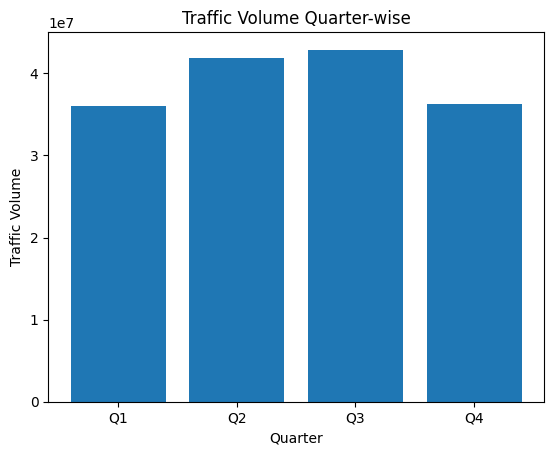

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the CSV file

df['date_time'] = pd.to_datetime(df['date_time'])

# Extract quarters from the date
df['quarter'] = df['date_time'].dt.quarter

# Group by quarter and sum the traffic volume
quarterly_traffic = df.groupby('quarter')['traffic_volume'].sum()

# Plot the bar plot
plt.bar(quarterly_traffic.index, quarterly_traffic.values)
plt.xlabel('Quarter')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Quarter-wise')
plt.xticks(quarterly_traffic.index, ['Q1', 'Q2', 'Q3', 'Q4'])
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


# Select numerical columns to normalize
numerical_columns = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']

# Normalize numerical columns
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


8. What differentiates Time series from image or table data?
Time series data is characterized by the temporal ordering of observations. Each data point is associated with a timestamp, and the sequence of observations over time is crucial for analysis. Image and table data, on the other hand, may lack this inherent sequential structure. Images are typically grids of pixels, and tables are collections of rows and columns without explicit temporal order.

In [ ]:
!pip install interpret

from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show

# Assuming X_train, y_train are your training data
ebm = ExplainableBoostingRegressor()
ebm.fit(X_train, y_train)

# Visualize feature importance
ebm_global = ebm.explain_global()
show(ebm_global)


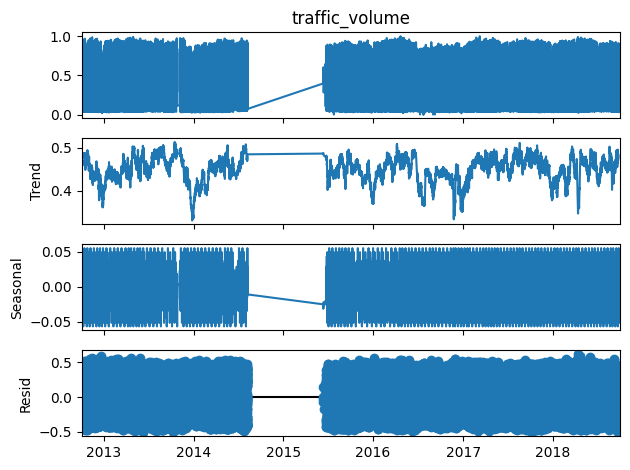

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df['date_time'] = pd.to_datetime(df['date_time'])
df = df.set_index('date_time')

# Decompose the time series
result = seasonal_decompose(df['traffic_volume'], model='additive', period=365)  # Adjust period as needed

# Plot the decomposition
result.plot()
plt.show()


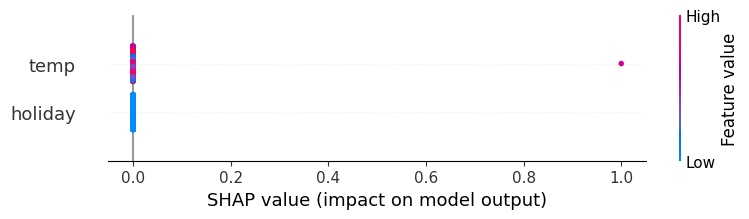

In [ ]:
import shap
from sklearn.tree import DecisionTreeClassifier

# Assuming X_train, y_train are your training data
# Assuming you have already loaded your dataset into X_train and y_train
X_train_subset = X_train.iloc[:2000, :]
y_train_subset = y_train.iloc[:2000]

model = DecisionTreeClassifier()
model.fit(X_train_subset, y_train_subset)

# Create a SHAP explainer
explainer = shap.Explainer(model)

# Calculate SHAP values for the first 2000 rows
shap_values = explainer.shap_values(X_train_subset)

# Summary plot
shap.summary_plot(shap_values[1], X_train_subset)
